In [1]:
import numpy as np
import matplotlib.pyplot as plt




In [2]:
# 问题参数
L = 1.0  # 空间范围
c = 1.0  # 波速
T = 2.0  # 时间范围
dx = 0.01  # 空间步长
dt = 0.005  # 时间步长
nx = int(L / dx) + 1  # 空间步数
nt = int(T / dt) + 1  # 时间步数

x = np.linspace(0, L, nx)
t = np.linspace(0, T, nt)

# 初始条件
u0 = np.sin(np.pi * x)
v0 = np.zeros_like(x)



In [3]:
# Newmark 法
def newmark(u0, v0, c, dx, dt, nx, nt, beta=0.25, gamma=0.5):
    u = np.zeros((nt, nx))
    v = np.zeros((nt, nx))
    a = np.zeros((nt, nx))
    u[0, :] = u0
    v[0, :] = v0

    # Newmark 法
    for n in range(1, nt):
        # 计算加速度
        a[n-1, 1:-1] = (u[n-1, 2:] - 2 * u[n-1, 1:-1] + u[n-1, :-2]) / dx**2 * c**2
        
        # 更新位移和速度
        u[n, 1:-1] = (u[n-1, 1:-1] + dt * v[n-1, 1:-1] + 
                     (0.5 - beta) * dt**2 * a[n-1, 1:-1])
        v[n, 1:-1] = (v[n-1, 1:-1] + dt * ((1 - gamma) * a[n-1, 1:-1]))

        # 边界条件
        u[n, 0] = 0
        u[n, -1] = 0
    
    return u



In [14]:
def runge_kutta(u0, v0, c, dx, dt, nx, nt):
    u = np.zeros((nt, nx))
    v = np.zeros((nt, nx))
    a = np.zeros((nt, nx))
    u[0, :] = u0
    v[0, :] = v0

    # Runge-Kutta 四阶法
    for n in range(1, nt):
        # 第1步
        k1_a = (u[n-1, 2:] - 2 * u[n-1, 1:-1] + u[n-1, :-2]) / dx**2 * c**2
        k1_v = v[n-1, 1:-1] + dt * k1_a / 2
        k1_u = u[n-1, 1:-1] + dt * v[n-1, 1:-1] / 2
        
        # 第2步
        u_mid = u[n-1, 1:-1] + k1_u * dt / 2
        v_mid = v[n-1, 1:-1] + k1_v * dt / 2
        k2_a = (u_mid[1:] - 2 * u_mid + u_mid[:-1]) / dx**2 * c**2
        k2_v = v_mid + dt * k2_a / 2
        k2_u = u_mid + dt * v_mid / 2
        
        # 第3步
        u_mid = u[n-1, 1:-1] + k2_u * dt / 2
        v_mid = v[n-1, 1:-1] + k2_v * dt / 2
        k3_a = (u_mid[1:] - 2 * u_mid + u_mid[:-1]) / dx**2 * c**2
        k3_v = v_mid + dt * k3_a
        k3_u = u_mid + dt * v_mid
        
        # 第4步
        k4_a = (k3_u[1:] - 2 * k3_u + k3_u[:-1]) / dx**2 * c**2
        k4_v = v[n-1, 1:-1] + dt * k4_a
        k4_u = u[n-1, 1:-1] + dt * k3_v
        
        # 更新位移和速度
        a[n, 1:-1] = (k1_a + 2 * k2_a + 2 * k3_a + k4_a) / 6
        u[n, 1:-1] = u[n-1, 1:-1] + dt * (v[n-1, 1:-1] + (k1_v + 2 * k2_v + 2 * k3_v + k4_v) / 6)
        v[n, 1:-1] = v[n-1, 1:-1] + dt * a[n, 1:-1]
        
        # 边界条件
        u[n, 0] = 0
        u[n, -1] = 0
    
    return u


In [9]:

# 执行 Newmark 法和 Runge-Kutta 法
newmark_solution = newmark(u0, v0, c, dx, dt, nx, nt)



In [15]:
runge_kutta_solution = runge_kutta(u0, v0, c, dx, dt, nx, nt)

ValueError: operands could not be broadcast together with shapes (98,) (99,) 

In [11]:

# 绘制结果
plt.figure(figsize=(12, 6))



<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0, 0.5, 't')

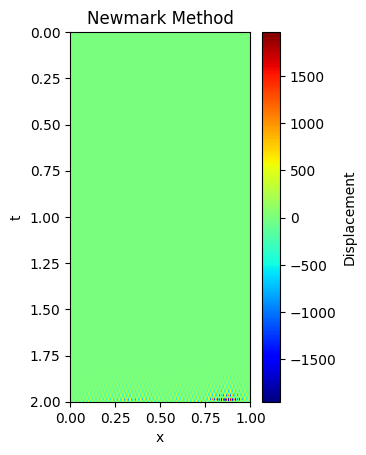

In [12]:
# 绘制 Newmark 法解
plt.subplot(1, 2, 1)
plt.imshow(newmark_solution, aspect='auto', extent=[0, L, T, 0], cmap='jet')
plt.colorbar(label='Displacement')
plt.title('Newmark Method')
plt.xlabel('x')
plt.ylabel('t')



In [ ]:
# 绘制 Runge-Kutta 法解
plt.subplot(1, 2, 2)
plt.imshow(runge_kutta_solution, aspect='auto', extent=[0, L, T, 0], cmap='jet')
plt.colorbar(label='Displacement')
plt.title('Runge-Kutta Method')
plt.xlabel('x')
plt.ylabel('t')



In [13]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>